In [ ]:
# Importing Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read csv data file
df = pd.read_csv('/content/Diwali Sales Data.csv', header= 0,
                        encoding= 'unicode_escape')


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(columns = ["Status", "unnamed1"], inplace=True)

In [ ]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
df.shape

(11251, 13)

In [ ]:
# drop null values
df.dropna(inplace=True)

In [ ]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [ ]:
# check data type
df['Amount'].dtypes

dtype('int64')

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [ ]:
df[["Age", "Orders", "Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# **Exploratory Data Analysis**

###**Gender**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

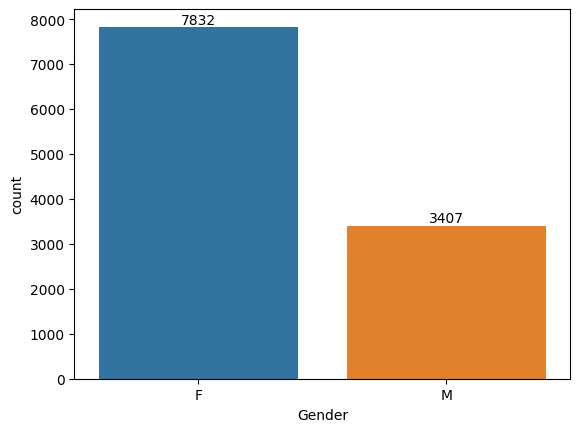

In [ ]:
# countplot
ax = sns.countplot(x = 'Gender', data = df)
for bar in ax.containers:
         ax.bar_label(bar)

  Gender    Amount
0      F  74335853
1      M  31913276


<Axes: xlabel='Gender', ylabel='Amount'>

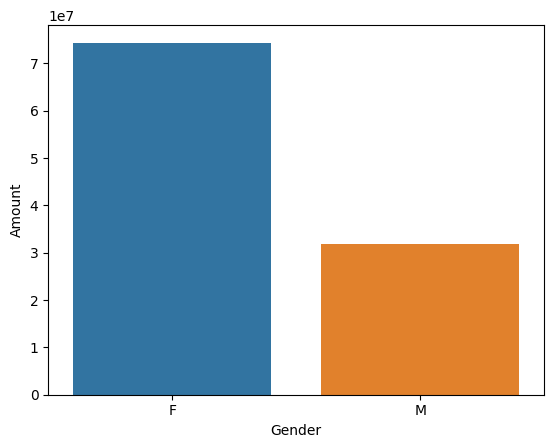

In [ ]:
#barplot
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
print(sales_gen)
sns.barplot(x = "Gender", y = 'Amount', data= sales_gen)

**above graph we can see that Female buyers are more than double than Male buyers and Purchasing power of females are also greater than male.**

### **Age**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

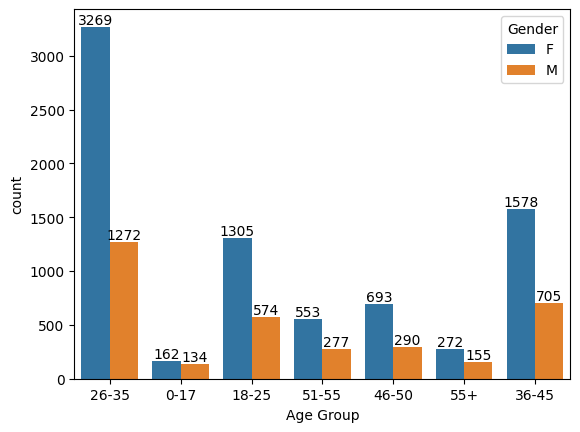

In [ ]:
#countplot
ax = sns.countplot(data = df, x = "Age Group", hue = "Gender")
for bars in ax.containers:
        ax.bar_label(bars)

**From above graph we can see that around 40% of purchases come from 26 to 35 age-group females.**

<Axes: xlabel='Age Group', ylabel='Amount'>

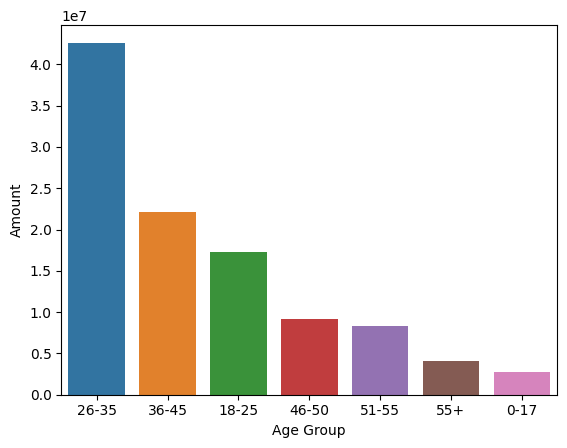

In [ ]:
#countplot
sales_age = df.groupby(["Age Group"], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

**From above graph we can see that maximum amount spended by 26 to 35 age-groups.**

### **State**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

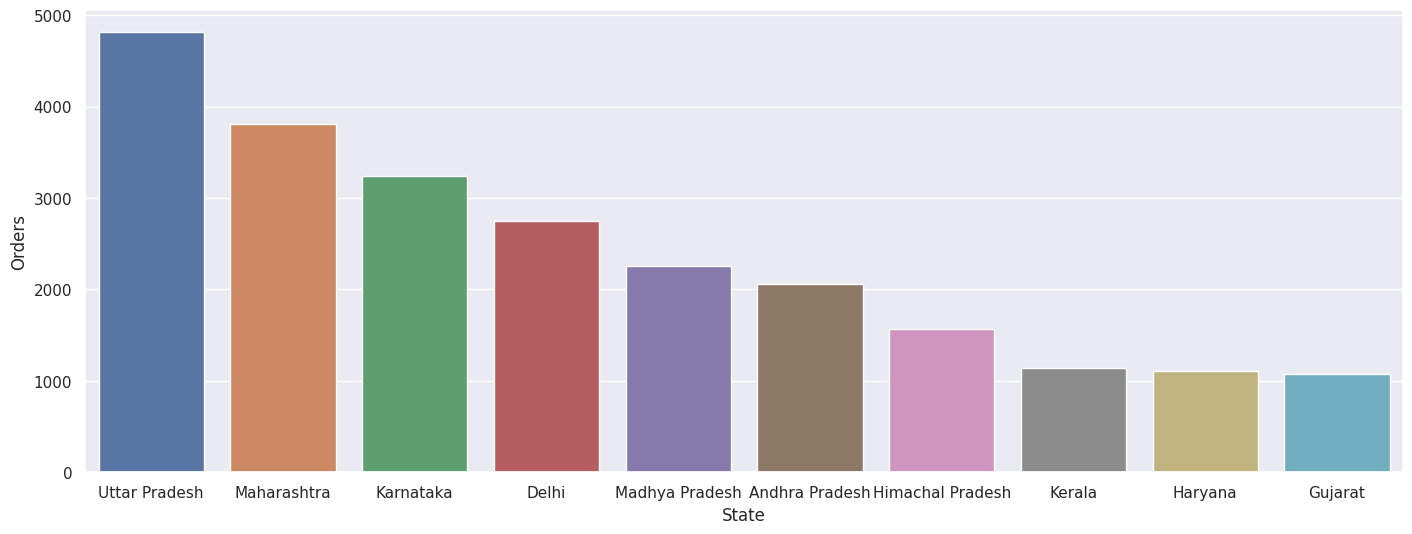

In [ ]:
# total number of sales from top 10 states
top_state_sales = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by="Orders", ascending=False).head(10)

sns.set(rc={'figure.figsize':(17, 6)})
sns.barplot(x ="State", y ="Orders", data = top_state_sales)



**From above graph we can see that maximum orders comes from Uttar Pradesh and second is maharashtra, third is Karnataka.**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Amount', ylabel='State'>

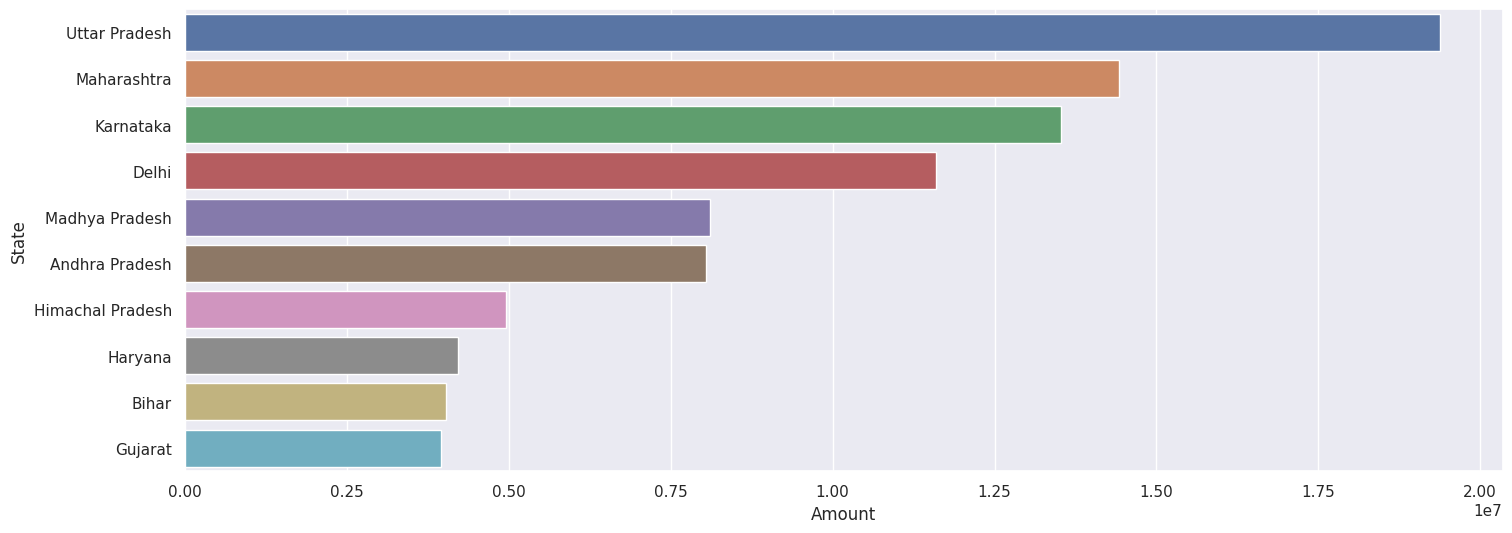

In [ ]:
# total amount from top 10 states
state_by_amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize':(17, 6)})
sns.barplot(y="State", x="Amount", data =state_by_amount)

**if we compair previous and this graph then we can se that Kerala state sales number is higher that Haryana, Bihar, and Gujarat but speding amount is less.**



### **Marital Status**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

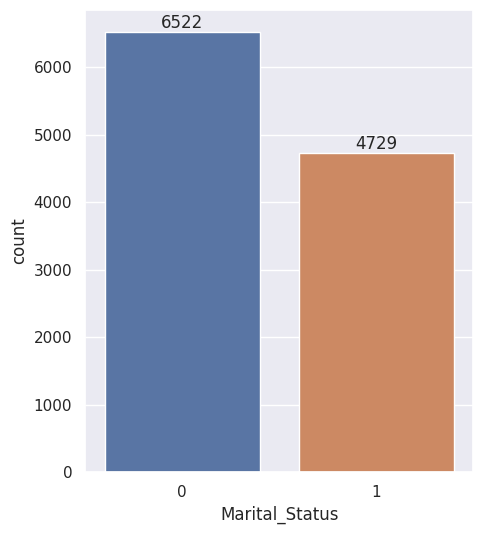

In [ ]:
ax = sns.countplot(x = "Marital_Status", data = df)
for bar in ax.containers:
       ax.bar_label(bar)
sns.set(rc={'figure.figsize':(5, 6)})

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Marital_Status', ylabel='Amount'>

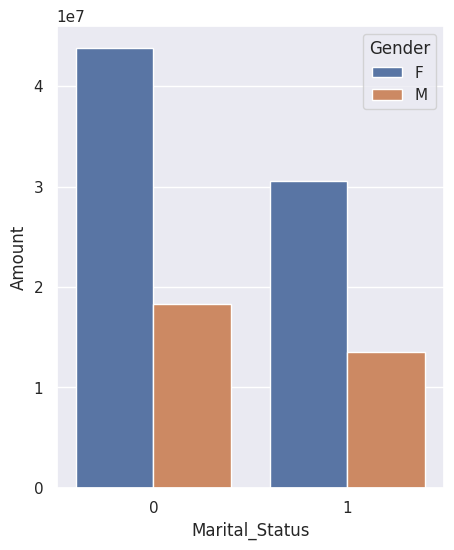

In [ ]:
Ax = df.groupby(["Marital_Status", 'Gender'], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False).head(10)
sns.set(rc={'figure.figsize':(5, 6)})
sns.barplot(x="Marital_Status", y="Amount", data=Ax, hue='Gender')

**From above graph we can see that married womens have spended maximum amount.**

### **Occupation**

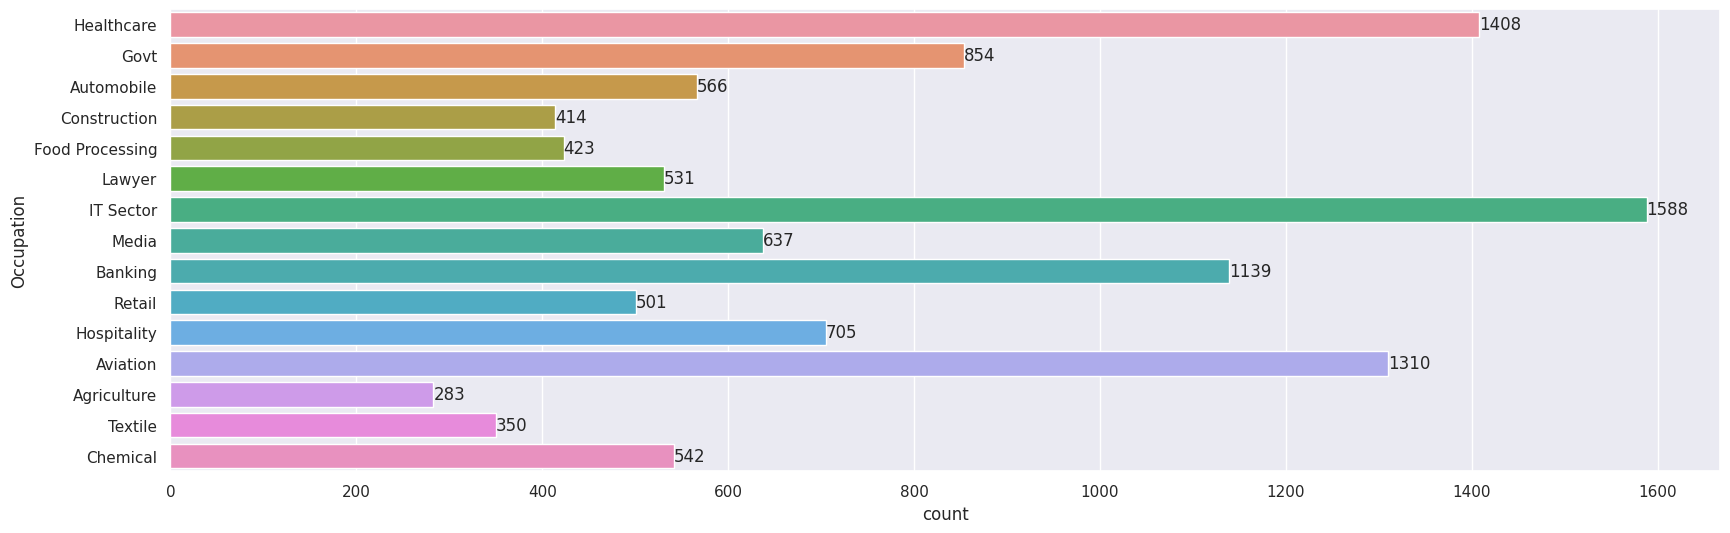

In [ ]:
sns.set(rc={"figure.figsize":(20, 6)})
occupation_by_sale = sns.countplot(data = df, y = "Occupation")
for bar in occupation_by_sale.containers:
            occupation_by_sale.bar_label(bar)


**From above graph we can see that most of the buyers are women in IT, Healthcare, Aviation**

### **Product Category**

In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

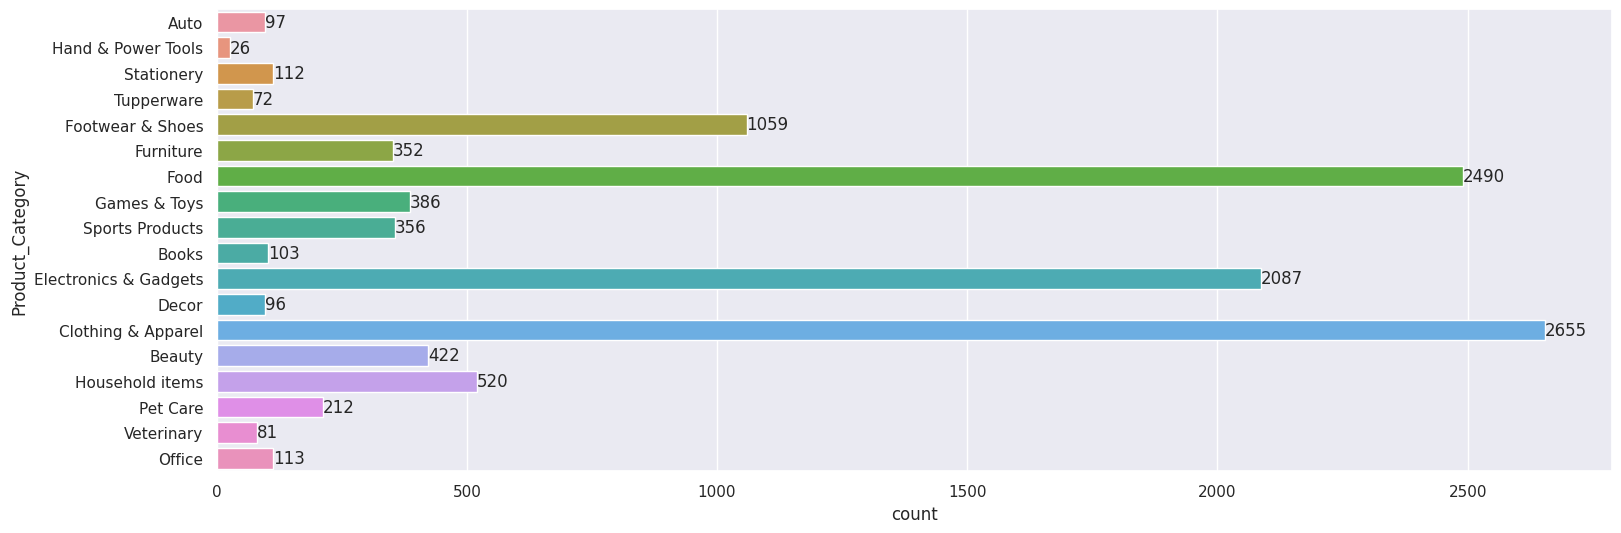

In [ ]:
sns.set(rc={'figure.figsize':(18, 6)})
produ_sales = sns.countplot(y = "Product_Category", data=df)
for bar in produ_sales.containers:
          produ_sales.bar_label(bar)

**From above graph we can see that maximum selling products are Clothing & Apparel, Food, Electronics & Gadgets.**

In [ ]:
df.columns

<Axes: xlabel='Amount', ylabel='Product_Category'>

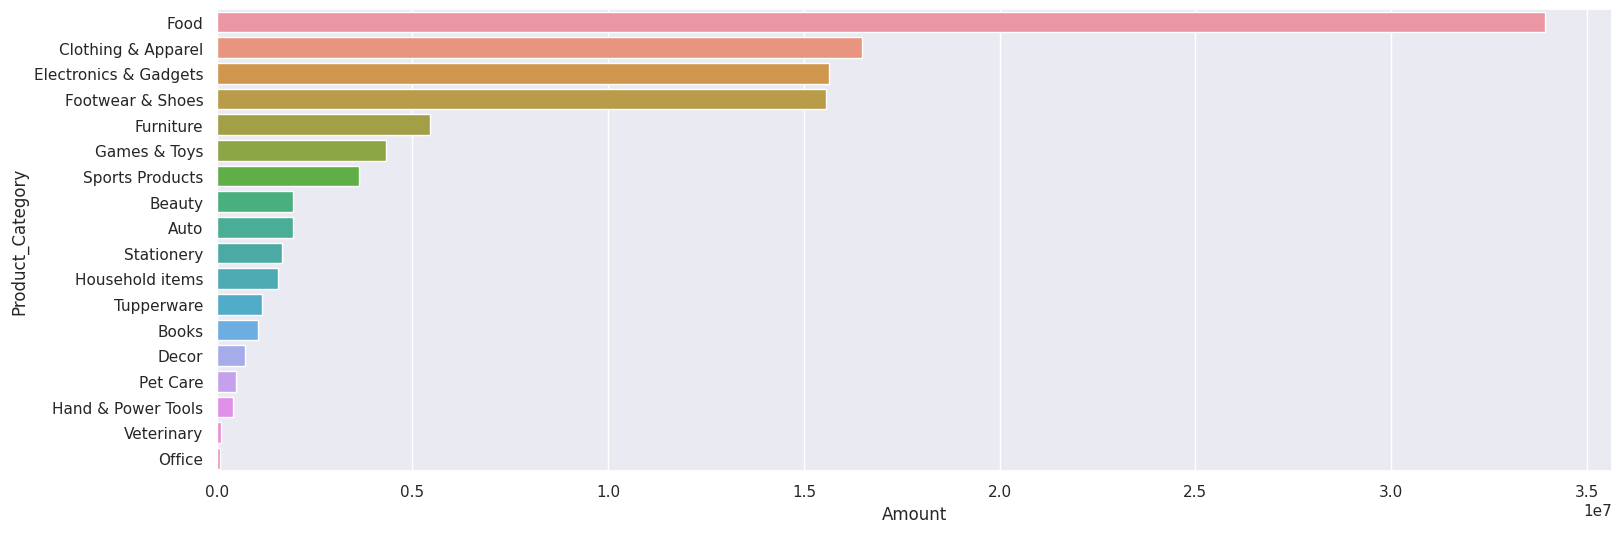

In [ ]:
spend_amount = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(y="Product_Category", x="Amount", data = spend_amount)

**if compair above two graphs then we can see that maximum sales are come from clothing & Apparel product but maximum spend is on Food product.**

### **Conclusion:**

**From above Analysis we can say that married women age-group 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka woking in IT, Healthcare,
and Aviation are more likely to buy products from Food, Clothing and Electronics category.**